In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [0]:
import torchvision
import torchvision.transforms as transforms

In [0]:
batch_size = 8
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

0it [00:00, ?it/s]

169009152it [00:06, 27110801.93it/s]                               


Extracting ./data/cifar-100-python.tar.gz to ./data


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([16, 3, 32, 32])
torch.Size([3, 32, 32])
74


## Visualise

In [0]:
img = images[0]
type(img)

torch.Tensor

In [0]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [0]:
npimg = np.transpose(npimg, (1,2,0))
npimg.shape

(32, 32, 3)

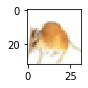

In [0]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

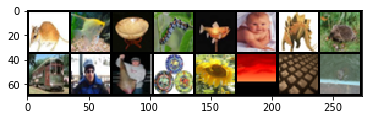

In [0]:
imshow(torchvision.utils.make_grid(images))

## LeNet Model

In [0]:
# class LeNet(nn.Module):
#   def __init__(self):
#     super(LeNet, self).__init__()
#     self.cnn_model = nn.Sequential(
#             nn.Conv2d(3, 6, 5),        
#             nn.Tanh(),
#             nn.AvgPool2d(2, stride=2),  
#             nn.Conv2d(6, 16, 5),        
#             nn.Tanh(),
#             nn.AvgPool2d(2, stride=2) 
#     )
#     self.fc_model = nn.Sequential(
#               nn.Linear(400,120),         
#               nn.Tanh(),
#               nn.Linear(120,84),          
#               nn.Tanh(),
#               nn.Linear(84,100)            
#           )
          
#   def forward(self, x):
#         x = self.cnn_model(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc_model(x)
#         return x

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),        
            nn.RReLU(),
            nn.AvgPool2d(2, stride=2),  
            nn.Conv2d(6, 16, 5),        
            nn.RReLU(),
            nn.AvgPool2d(2, stride=2) 
    )
    self.fc_model = nn.Sequential(
              nn.Linear(400,120),         
              nn.RReLU(),
              nn.Linear(120,84),          
              nn.RReLU(),
              nn.Linear(84,100)            
          )
          
  def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
batch_size = 128
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
# def evaluation(dataloader):
#     total, correct = 0, 0
#     for data in dataloader:
#         inputs, labels = data
#         outputs = net(inputs)
#         _, pred = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (pred == labels).sum().item()
#     return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

## Training without GPU

In [0]:
# %%time
# loss_arr = []
# loss_epoch_arr = []
# max_epochs = 16

# for epoch in range(max_epochs):

#     for i, data in enumerate(trainloader, 0):

#         inputs, labels = data

#         opt.zero_grad()

#         outputs = net(inputs)
#         loss = loss_fn(outputs, labels)
#         loss.backward()
#         opt.step()
        
#         loss_arr.append(loss.item())
        
#     loss_epoch_arr.append(loss.item())
        
#     print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
# plt.plot(loss_epoch_arr)
# plt.show()

## Training with GPU

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [0]:
%%time
max_epochs = 30
loss_arr = []
loss_epoch_arr = []

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

    plt.plot(loss_epoch_arr)
    plt.show()
        
    #print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/30, Test acc: 24.75, Train acc: 27.35
Epoch: 1/30, Test acc: 25.07, Train acc: 28.20
Epoch: 2/30, Test acc: 25.23, Train acc: 29.03
Epoch: 3/30, Test acc: 26.30, Train acc: 30.19
Epoch: 4/30, Test acc: 25.52, Train acc: 29.88
Epoch: 5/30, Test acc: 26.54, Train acc: 31.48
Epoch: 6/30, Test acc: 27.69, Train acc: 32.57
Epoch: 7/30, Test acc: 27.09, Train acc: 33.02
Epoch: 8/30, Test acc: 27.59, Train acc: 33.49
Epoch: 9/30, Test acc: 27.72, Train acc: 34.17
Epoch: 10/30, Test acc: 27.75, Train acc: 34.64
Epoch: 11/30, Test acc: 28.32, Train acc: 35.14
Epoch: 12/30, Test acc: 28.84, Train acc: 35.97
Epoch: 13/30, Test acc: 28.04, Train acc: 35.43
Epoch: 14/30, Test acc: 29.00, Train acc: 36.99
Epoch: 15/30, Test acc: 29.10, Train acc: 37.59
Epoch: 16/30, Test acc: 29.68, Train acc: 38.45
Epoch: 17/30, Test acc: 28.62, Train acc: 37.75
Epoch: 18/30, Test acc: 29.28, Train acc: 38.76
Epoch: 19/30, Test acc: 28.98, Train acc: 39.51
Epoch: 20/30, Test acc: 28.99, Train acc: 38.41
Ep